In [2]:
# Mazen Al Rifai
# 20198044
# MMA
# 2021W
# MMA 869
# 12 July 2020


# Answer to Question [1], Part [a]


In [3]:
import pandas as pd
import numpy as np

import matplotlib as mpl  #CHECK TO BE DELETED
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns 

from sklearn.metrics import silhouette_score, silhouette_samples
import sklearn.metrics
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import scipy

from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

from kmodes.kmodes import KModes #CHECK TO BE DELETED

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas_profiling
from pandas_profiling import ProfileReport



C:\Users\rifai\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Import Data

In [4]:
df = pd.read_csv(r"C:\Users\rifai\OneDrive\Queens University\MMA\MMA 869\Assignment 1\jewelry_customers.csv")

## EDA

In [5]:
list(df)
df.shape
df.info()
df.describe().transpose()
df.head(n=20)
df.tail()
pd.isna(df)
df.corr()


['Age', 'Income', 'SpendingScore', 'Savings']

(505, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


,count,mean,std,min,25%,50%,75%,max
Age,505.0,59.019802,24.140043,17.0,34.000000,59.000000,85.000000,97.0
Income,505.0,75513.291089,35992.922184,12000.0,34529.000000,75078.000000,107100.000000,142000.0
SpendingScore,505.0,0.505083,0.259634,0.0,0.304792,0.368215,0.768279,1.0
Savings,505.0,11862.455867,4949.229253,0.0,6828.709702,14209.932802,16047.268331,20000.0


,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


,Age,Income,SpendingScore,Savings
500,28,101206,0.387441,14936.775389
501,93,19934,0.203140,17969.693769
502,90,35297,0.355149,16091.401954
503,91,20681,0.354679,18401.088445
504,89,30267,0.289310,14386.351880


,Age,Income,SpendingScore,Savings
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
500,False,False,False,False
501,False,False,False,False
502,False,False,False,False
503,False,False,False,False


,Age,Income,SpendingScore,Savings
Age,1.000000,-0.828457,-0.329116,0.412337
Income,-0.828457,1.000000,0.196111,-0.410774
SpendingScore,-0.329116,0.196111,1.000000,-0.915379
Savings,0.412337,-0.410774,-0.915379,1.000000


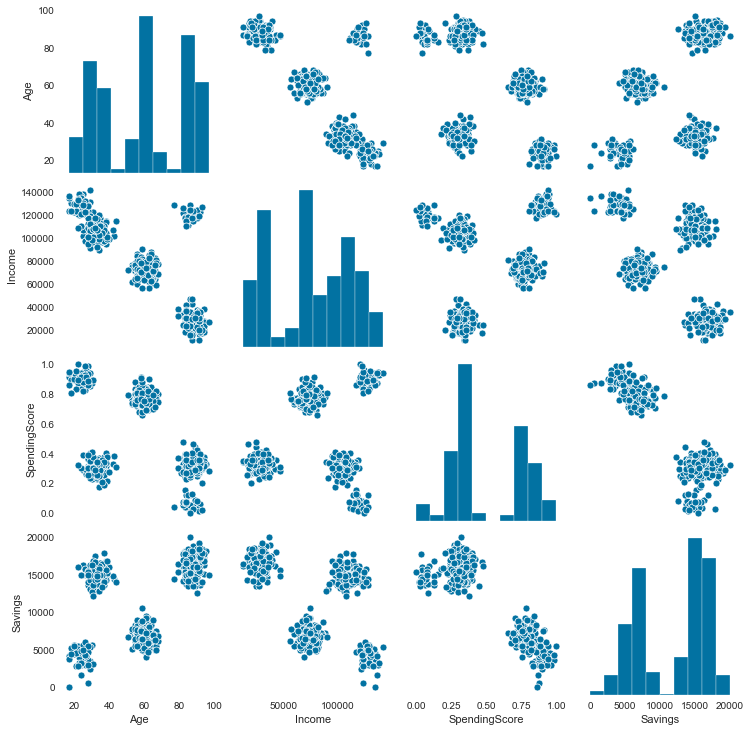

In [6]:
sns.pairplot(df) # Plotting variables against each other to detect patterns. There is a presence of clusters based on the below figure

In [ ]:
# pip install pandas-profiling==2.8.0 

In [7]:
profile = ProfileReport(df)

In [ ]:
profile

# Normalize the Data

In [8]:
X = df.copy()
#features = ['Income','SpendingScore', 'Age', 'Savings' ,] # Drop Age and Savings
#X=X[features]

In [9]:
    scaler = StandardScaler()

    X = scaler.fit_transform(X)

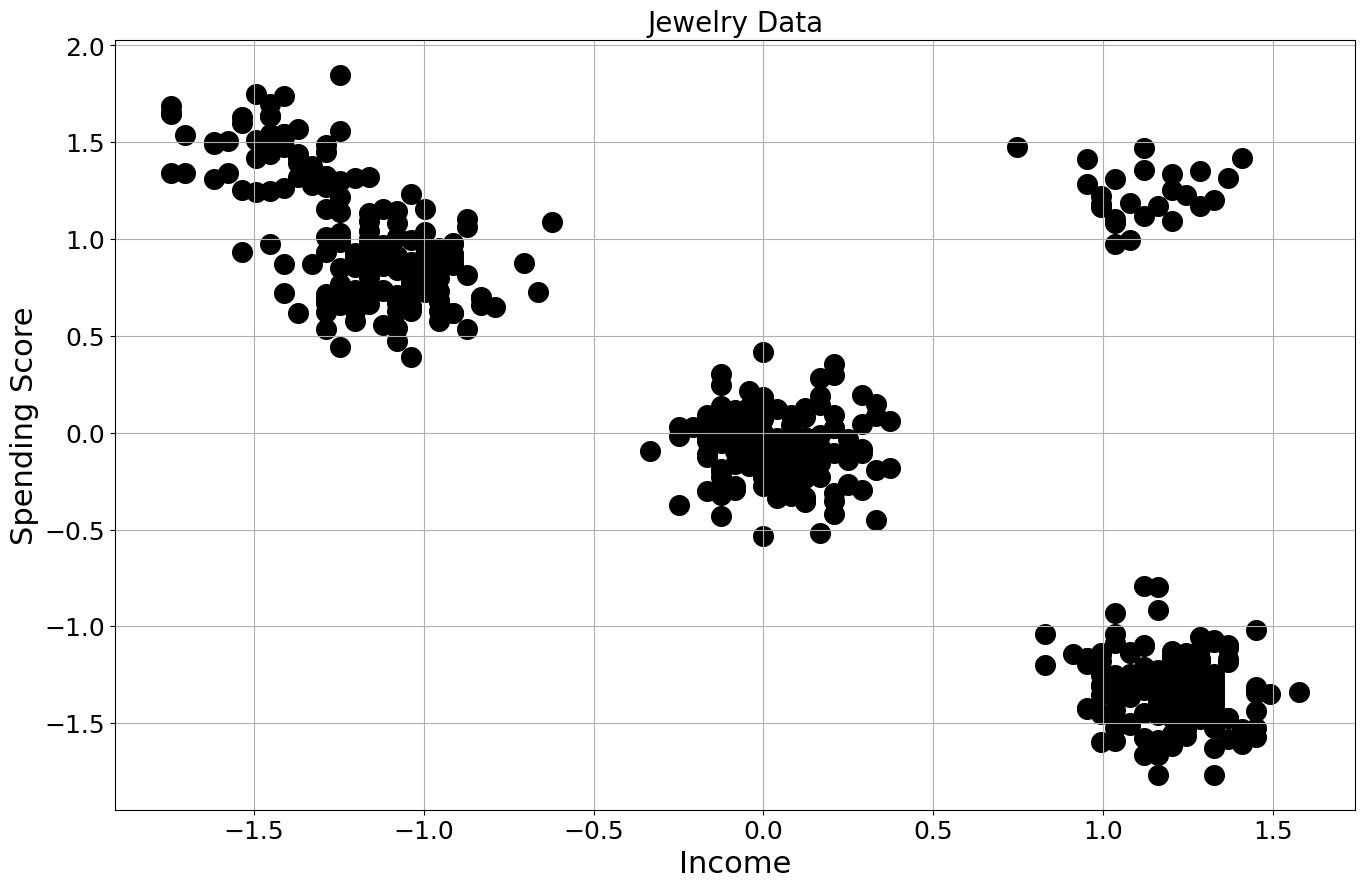

In [10]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X[:, 0], X[:, 1], c="black", s=200);
plt.title("Jewelry Data", fontsize=20);
plt.xlabel('Income', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);
plt.savefig('Spending Score Vs Income Raw Data.png');

# K-Means

In [11]:
k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=41)
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=41, tol=0.0001, verbose=0)

In [12]:
k_means.labels_

array([3, 3, 3, 3, 0, 1, 3, 0, 0, 0, 4, 2, 2, 2, 3, 4, 3, 0, 0, 4, 2, 4,
       3, 0, 4, 1, 1, 3, 0, 3, 3, 3, 0, 3, 2, 3, 0, 3, 2, 2, 3, 0, 1, 3,
       3, 1, 4, 1, 2, 3, 0, 2, 1, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 1, 1, 3, 3, 2, 0, 0, 2, 3, 2, 3, 3, 1, 3, 4, 3, 0, 0, 2, 2, 3,
       3, 3, 3, 3, 1, 0, 3, 1, 2, 3, 3, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 3,
       0, 2, 3, 2, 2, 2, 3, 2, 1, 0, 2, 0, 0, 0, 2, 4, 3, 0, 3, 3, 2, 3,
       2, 3, 1, 0, 4, 1, 3, 2, 0, 3, 3, 1, 3, 1, 3, 4, 3, 0, 3, 2, 0, 3,
       0, 4, 2, 3, 0, 3, 2, 0, 3, 2, 0, 2, 0, 3, 2, 3, 0, 3, 2, 3, 0, 3,
       3, 0, 0, 0, 3, 3, 2, 1, 1, 0, 2, 3, 3, 3, 2, 0, 3, 3, 3, 0, 1, 2,
       0, 0, 0, 2, 3, 2, 3, 2, 3, 0, 1, 3, 0, 0, 0, 0, 3, 0, 2, 1, 2, 0,
       3, 3, 2, 0, 2, 1, 2, 3, 3, 0, 3, 3, 0, 3, 3, 3, 2, 3, 2, 2, 1, 3,
       3, 3, 4, 3, 2, 0, 1, 1, 1, 0, 3, 2, 0, 0, 2, 2, 3, 3, 4, 3, 3, 0,
       3, 0, 2, 1, 3, 2, 0, 3, 0, 0, 2, 3, 0, 0, 3, 3, 0, 2, 2, 4, 2, 0,
       0, 2, 4, 0, 0, 1, 3, 2, 2, 3, 2, 0, 0, 2, 3,

In [13]:
# Let's look at the centers
k_means.cluster_centers_

array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

# Plot the Clusters

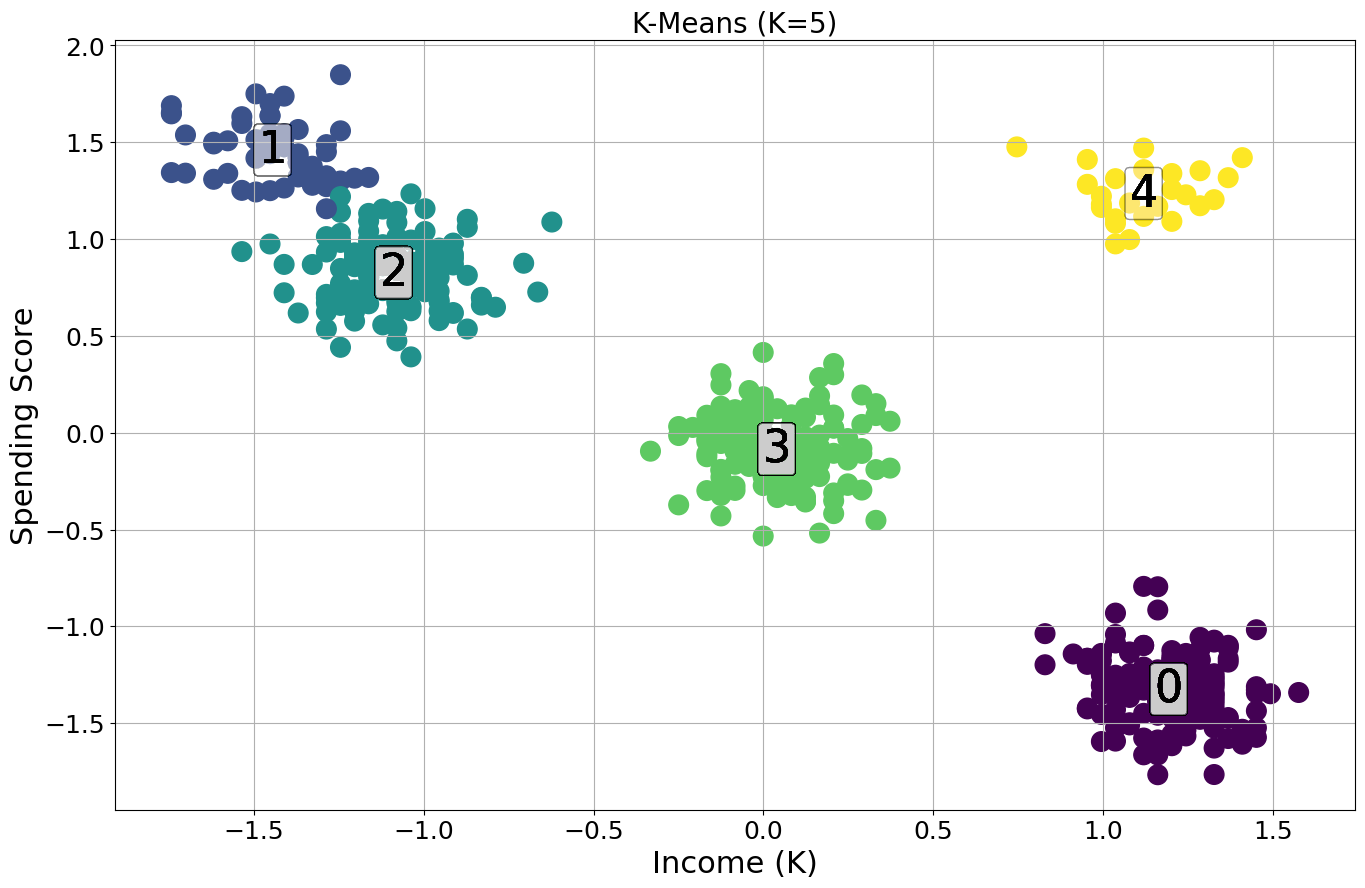

In [14]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

sc = plt.scatter(X[:, 0], X[:, 1], s=200, c=k_means.labels_);
#plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
plt.title("K-Means (K=5)", fontsize=20);
plt.xlabel('Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));

plt.savefig('Clusters.png');


## Internal Validation Metrics

In [15]:
# WCSS == Inertia
k_means.inertia_

66.5111137485908

In [16]:
silhouette_score(X, k_means.labels_)

0.8048976287755765

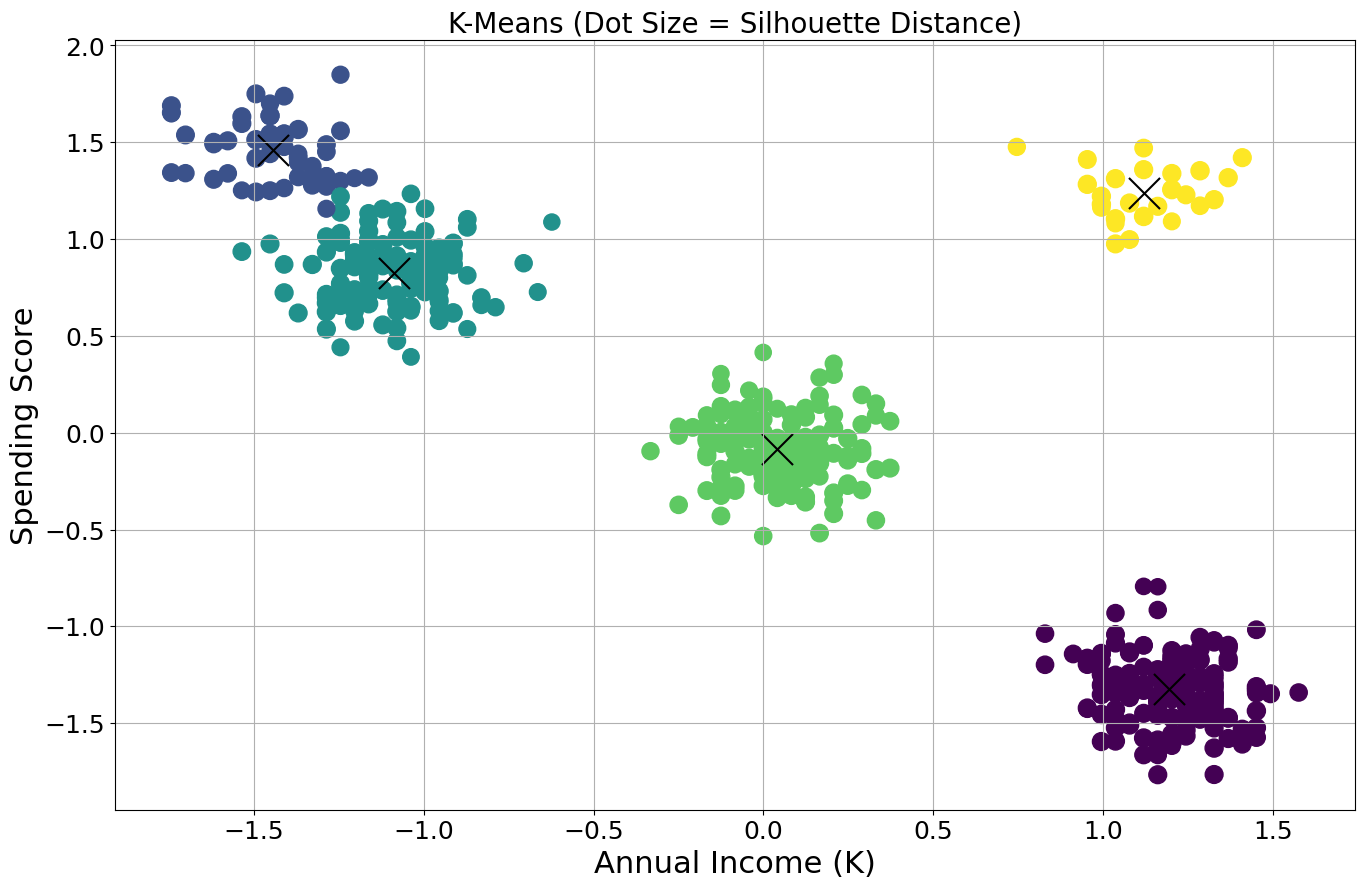

In [17]:
plt.style.use('default');

sample_silhouette_values = silhouette_samples(X, k_means.labels_)
sizes = 200*sample_silhouette_values

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X[:, 0], X[:, 1], s=sizes, c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

plt.title("K-Means (Dot Size = Silhouette Distance)", fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

plt.savefig('kmeans-5-silhouette.png');

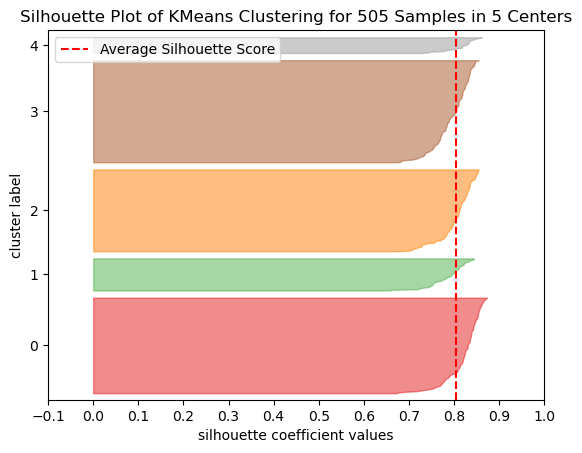

In [18]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('kmeans-5-silhouette.png', transparent=False);

## Elbow Method (Manual)

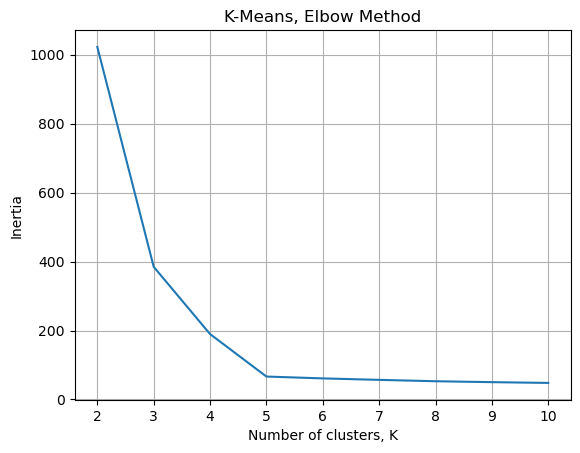

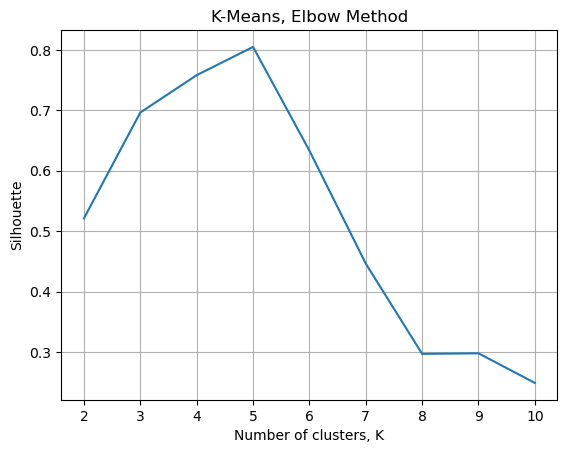

In [19]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(X)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(X, kmeans.labels_, metric='euclidean')
    

plt.figure();
plt.grid(True);
plt.plot(list(inertias.keys()), list(inertias.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Inertia");
plt.savefig('kmeans-elbow-interia.png');

plt.figure();
plt.grid(True);
plt.plot(list(silhouettes.keys()), list(silhouettes.values()));
plt.title('K-Means, Elbow Method')
plt.xlabel("Number of clusters, K");
plt.ylabel("Silhouette");
plt.savefig('kmeans-elbow-silhouettes.png');


## Intepretting the Clusters

### Means

In [20]:
k_means.cluster_centers_


array([[ 1.19238486, -1.32510593, -0.67963841,  0.97016358],
       [-1.44466803,  1.46050665,  1.51057952, -1.57249636],
       [-1.08815238,  0.82744102, -0.75240648,  0.6270464 ],
       [ 0.03879611, -0.08524639,  1.02721559, -1.00569483],
       [ 1.11876151,  1.23565419, -1.68367042,  0.59588052]])

In [25]:
for label in set(k_means.labels_):
    print('\nCluster{}:'.format(label))
    
    print(df[k_means.labels_==label].describe())
    



Cluster0:
              Age        Income  SpendingScore       Savings
count  147.000000    147.000000     147.000000    147.000000
mean    87.775510  27866.102041       0.328800  16659.261445
std      3.508885   6448.805481       0.045224   1183.850178
min     79.000000  12000.000000       0.203140  13470.970605
25%     85.000000  23361.000000       0.301502  15957.282919
50%     88.000000  27771.000000       0.324719  16711.067980
75%     91.000000  32601.000000       0.357267  17433.126684
max     97.000000  46977.000000       0.473550  20000.000000

Cluster1:
             Age         Income  SpendingScore      Savings
count  50.000000      50.000000      50.000000    50.000000
mean   24.180000  128029.120000       0.896892  4087.520309
std     3.662775    5688.904656       0.043466  1277.754801
min    17.000000  117108.000000       0.806553     0.000000
25%    22.000000  123042.000000       0.871957  3275.320193
50%    24.500000  128162.000000       0.890676  4361.967019
75%    27

In [ ]:
#scaler.inverse_transform(X[k_means.cluster_centers_]) #DELETE

In [ ]:
for label in set(k_means.labels_): #TO BE DELETED !!!
    print('\nCluster {}:'.format(label))
    X_tmp = X[k_means.labels_==label].copy()
    X_tmp['min'] = X_tmp.min()
    X_tmp['mean'] = X_tmp.mean()
    X_tmp['max'] = X_tmp.max()
    X_tmp['Variance'] = X_tmp.var()
    X_tmp['Skewness'] = X_tmp.skew()
    X_tmp['Kurtosis'] = X_tmp.kurtosis()
    X_tmp.tail(6).transpose()

In [ ]:
#Y=scaler.inverse_transform(X)  # TO BE DELETED 
#print(X)
#print(Y)


# Find Examplars

Let's find the observation that is closest to the cluster center

In [26]:
#df2=df.drop("Age",axis=1)
#df2=df2.drop("Savings",axis=1)

from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):    
    X_tmp = df[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(df.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    print(exemplar)


Cluster 0:
                         87
Age               58.000000
Income         70798.000000
SpendingScore      0.753528
Savings         5330.739900

Cluster 1:
                         36
Age               84.000000
Income         20704.000000
SpendingScore      0.379496
Savings        16816.911896

Cluster 2:
                         82
Age               64.000000
Income         88361.000000
SpendingScore      0.774556
Savings         7240.759687

Cluster 3:
                          99
Age                37.000000
Income         110595.000000
SpendingScore       0.286649
Savings         15235.445457

Cluster 4:
                          20
Age                30.000000
Income         101073.000000
SpendingScore       0.314387
Savings         14324.555977


In [ ]:
# Relative Importance Plots

In [ ]:
cluster_avg = dat.groupby(['Cluster']).mean()
population_avg = dat.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg

plt.figure(figsize=(8, 2));
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn');
plt.savefig('kmeans-5-importance.png', transparent=False);

## Experiment with Lots of Ks

In [ ]:
def do_kmeans(X, k):
    k_means = KMeans(init='k-means++', n_clusters=k, n_init=10, random_state=42)
    k_means.fit(X)
    wcss = k_means.inertia_
    sil = silhouette_score(X, k_means.labels_)
    
    plt.style.use('default');

    sample_silhouette_values = silhouette_samples(X, k_means.labels_)
    sizes = 200*sample_silhouette_values

    plt.figure(figsize=(16, 10));
    plt.grid(True);

    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=sizes, c=k_means.labels_)
    plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")

    plt.title("K-Means (K={}, WCSS={:.2f}, Sil={:.2f})".format(k, wcss, sil), fontsize=20);
    plt.xlabel('Annual Income (K)', fontsize=22);
    plt.ylabel('Spending Score', fontsize=22);
    plt.xticks(fontsize=18);
    plt.yticks(fontsize=18);
    plt.savefig('kmeans-auto-{}-silhouette-size.png'.format(k));
        
    
    visualizer = SilhouetteVisualizer(k_means)
    visualizer.fit(X)
    visualizer.poof()
    fig = visualizer.ax.get_figure()
    fig.savefig('kmeans-auto-{}-silhouette-plot.png'.format(k), transparent=False);
    
    print("K={}, WCSS={:.2f}, Sil={:.2f}".format(k, wcss, sil))

for k in range(2, 21):
    do_kmeans(X, k)

# Look at Individual Silhouette Scores

In [ ]:
k_means = KMeans(init='k-means++', n_clusters=7, n_init=10, random_state=42)
k_means.fit(X)
sample_silhouette_values = silhouette_samples(X, k_means.labels_)

X_tmp = X.copy()
X_tmp['Cluster ID'] = k_means.labels_

In [ ]:
X_tmp['Silhouette'] = sample_silhouette_values
X_tmp = X_tmp.sort_values(['Silhouette'])
X_tmp.head()
X_tmp.tail()

In [ ]:
plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X_tmp['AnnualIncome'], X_tmp['SpendingScore'], sizes=200*(X_tmp['Silhouette']+0.05), c=X_tmp['Cluster ID'])

plt.title("K-Means (K = {}, Sil={:.2f})".format(k_means.n_clusters, silhouette_score(X, kmeans.labels_, metric='euclidean')), fontsize=20);
plt.xlabel('Annual Income (K)', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

for label in k_means.labels_:
    plt.text(x=k_means.cluster_centers_[label, 0], y=k_means.cluster_centers_[label, 1], s=label, fontsize=32, 
             horizontalalignment='center', verticalalignment='center', color='black',
             bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));
    
for i, txt in enumerate(X_tmp.index.values):
    sil = X_tmp['Silhouette'].iloc[i]
    if sil < 0.05:
        plt.text(x=X_tmp['AnnualIncome'].iloc[i], y=X_tmp['SpendingScore'].iloc[i], s=txt, fontsize=22)

plt.savefig('out/mall-kmeans-{}-silhouette-size-labels.png'.format(k_means.n_clusters));

In [ ]:
visualizer = SilhouetteVisualizer(k_means)
visualizer.fit(X)
visualizer.poof()
fig = visualizer.ax.get_figure()
fig.savefig('out/mall-kmeans-{}-silhouette-f.png'.format(k_means.n_clusters), transparent=False);

# Hierarchical (Agglomerative)

In [ ]:
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(X)

In [ ]:
agg.labels_


In [ ]:
silhouette_score(X, agg.labels_)


In [ ]:
plt.style.use('default');

plt.figure(figsize=(16, 10));
plt.grid(True);

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=200, c=agg.labels_);
plt.title("Agglomerative", fontsize=20);
plt.xlabel('Income', fontsize=22);
plt.ylabel('Spending Score', fontsize=22);
plt.xticks(fontsize=18);
plt.yticks(fontsize=18);

In [ ]:
pip install ipython

In [ ]:
pip install nbconvert

In [ ]:
ipynb-py-convert examples/plot.ipynb examples/plot.py

